In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import statsmodels.formula.api as smf
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
data = pd.read_csv("C:/Users/haris/Downloads/assignment ds/multi linear regression/50_Startups.csv")
data.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [3]:
print(data.State.unique())

['New York' 'California' 'Florida']


In [5]:
# convert categorical data :
le = LabelEncoder()
data["State"] = data["State"].astype('category')
data["State"] = le.fit_transform(data["State"])
data = data.rename({"R&D Spend":"rdspend", "Marketing Spend":"marketingspend"}, axis=1)
data.head()

,rdspend,Administration,marketingspend,State,Profit
0,165349.20,136897.80,471784.10,2,192261.83
1,162597.70,151377.59,443898.53,0,191792.06
2,153441.51,101145.55,407934.54,1,191050.39
3,144372.41,118671.85,383199.62,2,182901.99
4,142107.34,91391.77,366168.42,1,166187.94


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   rdspend         50 non-null     float64
 1   Administration  50 non-null     float64
 2   marketingspend  50 non-null     float64
 3   State           50 non-null     int64  
 4   Profit          50 non-null     float64
dtypes: float64(4), int64(1)
memory usage: 2.1 KB


In [7]:
data.corr()

,rdspend,Administration,marketingspend,State,Profit
rdspend,1.000000,0.241955,0.724248,0.104685,0.972900
Administration,0.241955,1.000000,-0.032154,0.011847,0.200717
marketingspend,0.724248,-0.032154,1.000000,0.077670,0.747766
State,0.104685,0.011847,0.077670,1.000000,0.101796
Profit,0.972900,0.200717,0.747766,0.101796,1.000000


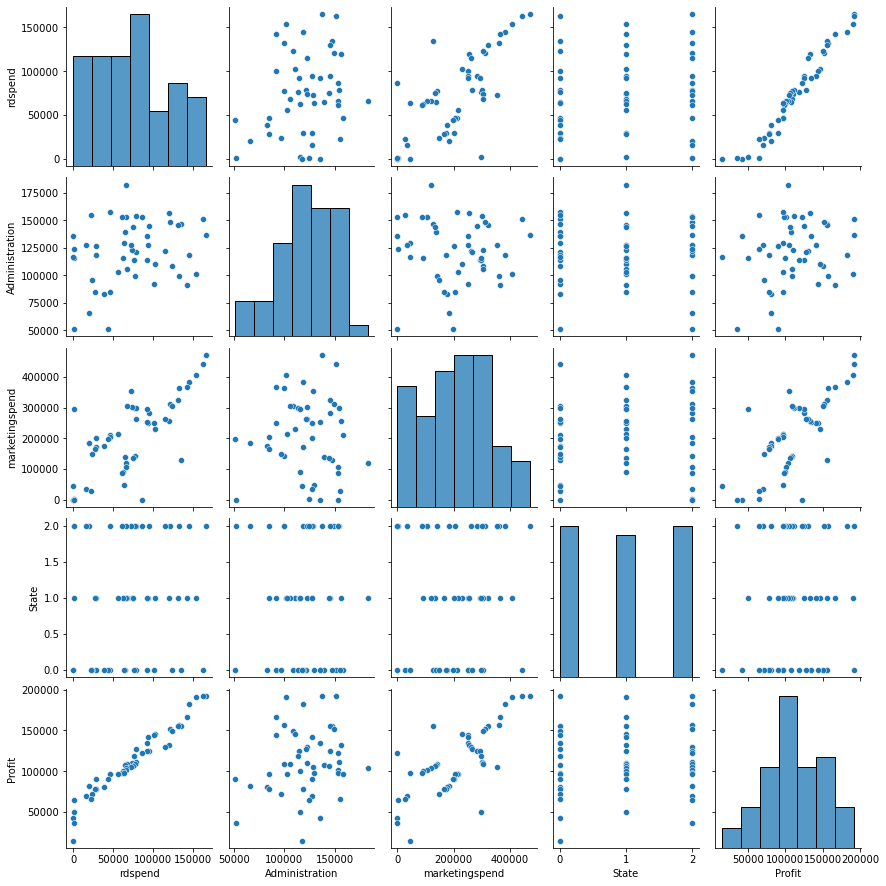

In [8]:
sns.pairplot(data)
plt.show()

In [9]:
# using ols :
model_1 = smf.ols('Profit~rdspend+Administration+marketingspend+State', data=data).fit()
model_1.summary()     

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.946
Method:                 Least Squares   F-statistic:                     217.2
Date:                Mon, 24 May 2021   Prob (F-statistic):           8.51e-29
Time:                        07:51:16   Log-Likelihood:                -525.39
No. Observations:                  50   AIC:                             1061.
Df Residuals:                      45   BIC:                             1070.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       5.014e+04   6804.555      7.369      0.000    3.64e+04    6.38e+04
rdspend            0.8058      0.046     17.609      0.000       0.714       0.898
Administration    -0.0268      0.052     -0.520      0.606      -0.131       0.077
marketingspend     0.0272      0.017      1.637      0.109      -0.006       0.061
State            -22.3206   1609.829     -0.014      0.989   -3264.682    3220.041
==============================================================================
Omnibus:                       14.864   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.542
Skew:                          -0.949   Prob(JB):                     2.10e-05
Kurtosis:                       5.596   Cond. No.                     1.44e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.44e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [10]:
model_2 = smf.ols('np.log(Profit)~rdspend+Administration+marketingspend+State', data=data).fit()
model_2.summary()
# if take np.log(Profit) , R2 = 0.763, AIC = 1.843

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         np.log(Profit)   R-squared:                       0.763
Model:                            OLS   Adj. R-squared:                  0.742
Method:                 Least Squares   F-statistic:                     36.30
Date:                Mon, 24 May 2021   Prob (F-statistic):           1.50e-13
Time:                        07:52:32   Log-Likelihood:                 4.0787
No. Observations:                  50   AIC:                             1.843
Df Residuals:                      45   BIC:                             11.40
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         10.8174      0.171     63.124      0.000      10.472      11.163
rdspend         8.077e-06   1.15e-06      7.008      0.000    5.76e-06    1.04e-05
Administration  3.184e-07    1.3e-06      0.245      0.808    -2.3e-06    2.94e-06
marketingspend  3.219e-07   4.19e-07      0.768      0.446   -5.22e-07    1.17e-06
State              0.0229      0.041      0.566      0.574      -0.059       0.105
==============================================================================
Omnibus:                       72.823   Durbin-Watson:                   0.539
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              850.609
Skew:                          -3.799   Prob(JB):                    1.96e-185
Kurtosis:                      21.724   Cond. No.                     1.44e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.44e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [11]:
model_3 = smf.ols('np.log(Profit)~rdspend+Administration+marketingspend', data=data).fit()
model_3.summary()
# if dont take State then R2 = 0.762 , AIC = 0.1972

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         np.log(Profit)   R-squared:                       0.762
Model:                            OLS   Adj. R-squared:                  0.746
Method:                 Least Squares   F-statistic:                     49.02
Date:                Mon, 24 May 2021   Prob (F-statistic):           2.28e-14
Time:                        07:54:31   Log-Likelihood:                 3.9014
No. Observations:                  50   AIC:                            0.1972
Df Residuals:                      46   BIC:                             7.845
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         10.8383      0.166     65.249      0.000      10.504      11.173
rdspend         8.122e-06   1.14e-06      7.118      0.000    5.83e-06    1.04e-05
Administration  3.083e-07   1.29e-06      0.239      0.812   -2.29e-06     2.9e-06
marketingspend  3.214e-07   4.16e-07      0.773      0.443   -5.15e-07    1.16e-06
==============================================================================
Omnibus:                       74.731   Durbin-Watson:                   0.554
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              936.557
Skew:                          -3.913   Prob(JB):                    4.26e-204
Kurtosis:                      22.705   Cond. No.                     1.40e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [12]:
model_4 = smf.ols('np.log(Profit)~rdspend+marketingspend+State', data=data).fit()
model_4.summary()
# if dont take administration then, R2 =0.763, AIC = -0.09070

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         np.log(Profit)   R-squared:                       0.763
Model:                            OLS   Adj. R-squared:                  0.748
Method:                 Least Squares   F-statistic:                     49.39
Date:                Mon, 24 May 2021   Prob (F-statistic):           1.99e-14
Time:                        07:55:13   Log-Likelihood:                 4.0453
No. Observations:                  50   AIC:                          -0.09070
Df Residuals:                      46   BIC:                             7.557
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         10.8549      0.077    141.889      0.000      10.701      11.009
rdspend         8.185e-06   1.05e-06      7.775      0.000    6.07e-06    1.03e-05
marketingspend    2.9e-07   3.94e-07      0.736      0.466   -5.03e-07    1.08e-06
State              0.0228      0.040      0.568      0.573      -0.058       0.104
==============================================================================
Omnibus:                       72.742   Durbin-Watson:                   0.529
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              843.083
Skew:                          -3.798   Prob(JB):                    8.45e-184
Kurtosis:                      21.628   Cond. No.                     6.17e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.17e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [13]:
model_5 = smf.ols('np.log(Profit)~rdspend+marketingspend', data=data).fit()
model_5.summary()
# R2 = 0.761, AIC = -1.741

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         np.log(Profit)   R-squared:                       0.761
Model:                            OLS   Adj. R-squared:                  0.751
Method:                 Least Squares   F-statistic:                     75.00
Date:                Mon, 24 May 2021   Prob (F-statistic):           2.37e-15
Time:                        07:55:44   Log-Likelihood:                 3.8704
No. Observations:                  50   AIC:                            -1.741
Df Residuals:                      47   BIC:                             3.995
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         10.8745      0.068    160.335      0.000      10.738      11.011
rdspend         8.227e-06   1.04e-06      7.892      0.000    6.13e-06    1.03e-05
marketingspend  2.906e-07   3.91e-07      0.743      0.461   -4.97e-07    1.08e-06
==============================================================================
Omnibus:                       74.604   Durbin-Watson:                   0.543
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              926.960
Skew:                          -3.909   Prob(JB):                    5.17e-202
Kurtosis:                      22.592   Cond. No.                     5.32e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.32e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [14]:
# Table for R2_value and AIC value :
model_df = pd.DataFrame({"models":["model_1", "model_2", "model_3", "model_4", "model_5"],
                         "R2_value":[0.951, 0.763, 0.762, 0.763, 0.761],
                         "AIC_value":[1061, 1.843, 0.1972, -0.09070, -1.741]})
model_df

,models,R2_value,AIC_value
0,model_1,0.951,1061.0000
1,model_2,0.763,1.8430
2,model_3,0.762,0.1972
3,model_4,0.763,-0.0907
4,model_5,0.761,-1.7410


In [15]:
# from above we can take model_4 for predictiong newdata :
new_data = pd.DataFrame({"rdspend":120000 , "marketingspend":300000, "State":2}, index=[0])
print(np.exp(model_4.predict(new_data)))

0    157909.050802
dtype: float64
